<a href="https://colab.research.google.com/github/JunHill/CS114.K21.KHTN/blob/master/HeadlineClassifier_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PHÂN LOẠI TIÊU ĐỀ BÀI BÁO (HEADLINES) THEO CHỦ ĐỀ (TOPICS)

*Tập chủ đề : { Chính Trị (1) - Kinh Doanh (2) - Đời Sống (3) - Pháp Luật (4) - Thể Thao (5) - Khoa học & Công Nghệ (6) - Giáo Dục (7) - Giải Trí (8) }

*   **Input: Tiêu đề bài báo** -
ví dụ: "Trường đại học Công Nghệ Thông Tin: Những bước đi tiên phong - sáng tạo"
*   **Output: Chủ đề bài báo (1-8)**: Giáo dục(7)



In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import pandas as pd

import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.stochastic_gradient module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [11]:
# To see full pandas row 
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


#Thu thập dữ liệu
Nguồn dữ liệu cung cấp cho train và test để xây dựng và chọn lựa model được lấy từ 2 trang web báo uy tín là vnexpress và vietnamnet. Model tốt nhất được chọn lựa sau quá trình train and test sẽ được demo phân loại tiêu đề của các trang báo khác (báo phụ nữ, báo thanh niên, báo tuổi trẻ).
###CODE for Data Crawler can be found here, on my Github Repo: 
* Các function: https://github.com/JunHill/CS114.K21.KHTN/blob/master/crawler.py
* Crawl dữ liệu từ VN-Express: https://github.com/JunHill/CS114.K21.KHTN/blob/master/vn_express_crawler.py
* Crawl dữ liệu từ VietnamNet: https://github.com/JunHill/CS114.K21.KHTN/blob/master/vietnamnet_crawler.py
* Training and Validating Data source: 
https://vnexpress.net/
https://vietnamnet.vn/vn/thoi-su/chinh-tri/trang1/
* Testing data source: 
https://www.phunuonline.com.vn/
https://tuoitre.vn/
* headline_data.json: https://github.com/JunHill/CS114.K21.KHTN/blob/master/headline_data.json

In [ ]:
#--------------------------
# Load data from our json files
#--------------------------
data = pd.read_json('C:/backupD/headline_data.json', lines=True)
data = data.sample(frac=1)
data['topic_names'] = [None] * len(data)
data.loc[data.topic==1, 'topic_names'] = "Chính Trị & Quân Sự"
data.loc[data.topic==2, 'topic_names'] = "Kinh Doanh"
data.loc[data.topic==3, 'topic_names'] = "Đời sống"
data.loc[data.topic==4, 'topic_names'] = "Pháp Luật"
data.loc[data.topic==5, 'topic_names'] = "Thể Thao"
data.loc[data.topic==6, 'topic_names'] = "Khoa Học & Công Nghệ"
data.loc[data.topic==7, 'topic_names'] = "Giáo Dục"
data.loc[data.topic==8, 'topic_names'] = "Giải Trí"
cols = ["headline", "topic", "topic_names"]
data = data[cols].reset_index(drop=True)
data = data.drop_duplicates(subset=['headline'])
data[:10]

,headline,topic,topic_names
0,Những cách đơn giản giúp bạn thông minh hơn mỗi ngày,3,Đời sống
1,Vụ nổ động cơ phá hủy chiếc tiêm kích 88 triệu USD của Australia,1,Chính Trị & Quân Sự
2,Mảnh giấy lạ chỉ dẫn nơi tìm thi thể đôi vợ chồng ở Thanh Hoá,4,Pháp Luật
3,"Cách làm chè xoài mát lạnh, xóa tan nóng nực",3,Đời sống
4,NASA lên kế hoạch bảo vệ Trái Đất trước tiểu hành tinh,6,Khoa Học & Công Nghệ
5,6 lần bán nhà nhanh và được giá của cặp vợ chồng Sài Gòn,3,Đời sống
6,Giá vàng hiện nay khác gì năm 2008?,2,Kinh Doanh
7,Shophouse Sài Gòn có thiết kế thang máy giá triệu USD,2,Kinh Doanh
8,Tình tiết khó tin vụ trộm 'khoắng' gần 800 chỉ vàng nhà nữ đại gia,4,Pháp Luật
9,Vẽ kim tự tháp 3D trong vài phút,7,Giáo Dục


#Mô tả dữ liệu
* Số lượng: 167,322 tiêu đề 
* Các tiêu đề được viết bởi tác giả của vnexpress và vietnamnet nên sẽ không có sai chính tả, sai ngữ nghĩa.
* Các từ vựng của tiêu đề thể hiện tương đối chính xác về chủ đề đã được label, tuy nhiên vẫn còn nhiều sự trùng lặp trong từ vựng của các chủ đề.
* Dữ liệu sẽ được chia 7:3 cho train và test sau khi shuffle. 

In [ ]:
data.describe()

,topic
count,167322.000000
mean,4.735038
std,2.292571
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,8.000000


Text(0.5, 1.0, 'Số lượng các tiêu đề bài báo')

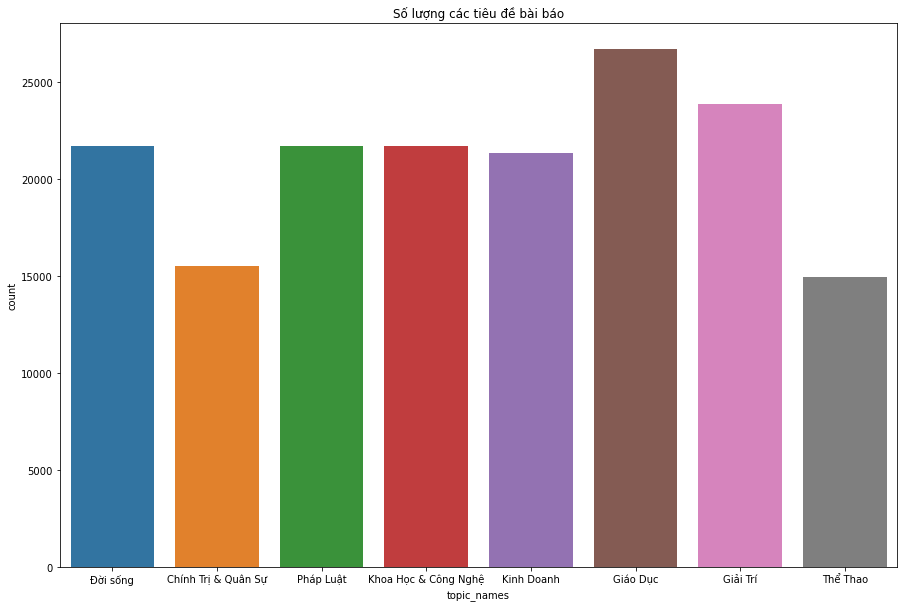

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.countplot(data.topic_names).set_title('Số lượng các tiêu đề bài báo')

**CLEAN DATA và TÁCH TỪ TIẾNG VIỆT**




In [9]:
!pip install pyvi
from pyvi import ViTokenizer

     |████████████████████████████████| 8.5MB 2.6MB/s 
     |████████████████████████████████| 747kB 44.4MB/s 


In [7]:
#Xoá bớt những kí tự không cần thiết như - / ? . 
def clean(pd_series):
    pd_series = pd_series.str.lower()
    pd_series = pd_series.str.replace(r'[-\'.,?":/!@#$%^&*()]', '')
    pd_series = pd_series.str.replace(r'\d+', '')
    return pd_series

#Tách từ tiếng việt, sử dụng thư viện ViTokenizer: https://pypi.org/project/pyvi/  https://github.com/trungtv/pyvi
# 'cô dâu đồng tính là á hậu' ---> 'cô_dâu đồng_tính là á_hậu'
def tokenize(text):
    return ViTokenizer.tokenize(text)

In [ ]:
data['headline'] = clean(data['headline'])
data['headline'] = data['headline'].apply(tokenize)
data[:10]

,headline,topic,topic_names
0,những cách đơn_giản giúp bạn thông_minh hơn mỗi ngày,3,Đời sống
1,vụ nổ động_cơ phá_hủy chiếc tiêm_kích triệu usd của australia,1,Chính Trị & Quân Sự
2,mảnh giấy lạ chỉ_dẫn nơi tìm thi_thể đôi vợ_chồng ở thanh_hoá,4,Pháp Luật
3,cách làm chè xoài mát lạnh xóa_tan nóng_nực,3,Đời sống
4,nasa lên kế_hoạch bảo_vệ trái_đất trước tiểu hành_tinh,6,Khoa Học & Công Nghệ
5,lần bán nhà nhanh và được giá của cặp vợ_chồng sài_gòn,3,Đời sống
6,giá vàng hiện_nay khác gì năm,2,Kinh Doanh
7,shophouse sài_gòn có thiết_kế thang_máy giá triệu usd,2,Kinh Doanh
8,tình_tiết khó tin vụ trộm khoắng gần chỉ vàng nhà nữ đại_gia,4,Pháp Luật
9,vẽ kim_tự_tháp d trong vài phút,7,Giáo Dục


In [ ]:
# Split train (70%) - test(30%)
X_train, X_test, y_train, y_test = train_test_split(data['headline'].tolist(), data['topic'].tolist(), test_size=0.3, random_state=42)
print(X_train[:5])
print(y_train[:5])

['người việt tốn gần tỷ usd uống bia năm', 'phân_biệt see look watch view', 'cựu hoa_hậu hòa bình bị loại khỏi miss universe australia', 'nghiên_cứu mới tiết_lộ bộ_phận gợi_cảm nhất trên_cơ_thể phụ_nữ', 'quy_trình huấn_luyện lính bắn tỉa trinh_sát mỹ']
[1, 7, 8, 3, 1]


In [ ]:
data.shape

(167322, 3)

training shape: 117125


Text(0.5, 1.0, 'Số lượng các tiêu đề bài báo trong tập train')

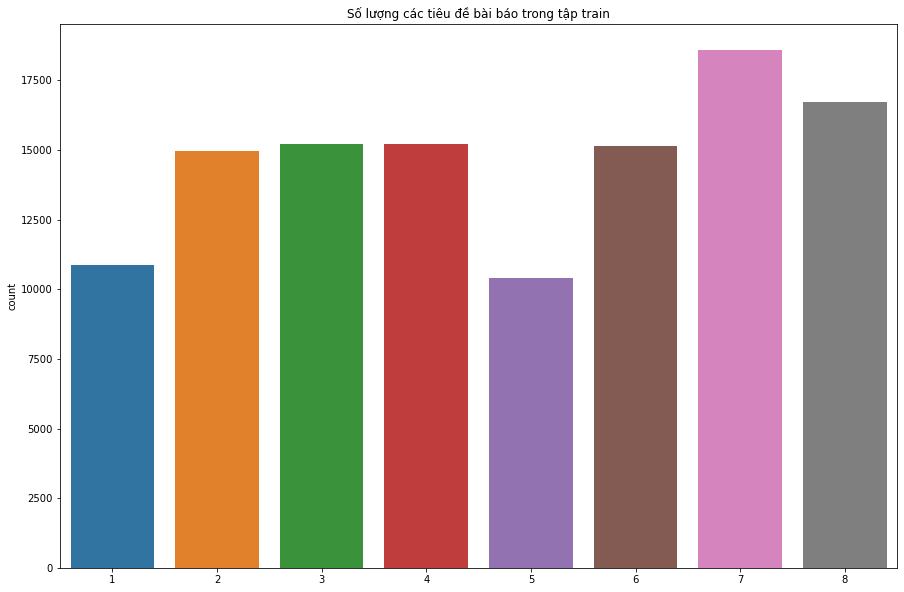

In [ ]:
import seaborn as sns
print(f"training shape: {len(X_train)}")
plt.figure(figsize=(15,10))
sns.countplot(y_train).set_title('Số lượng các tiêu đề bài báo trong tập train')

testing shape: 50197


Text(0.5, 1.0, 'Số lượng các tiêu đề bài báo trong tập test')

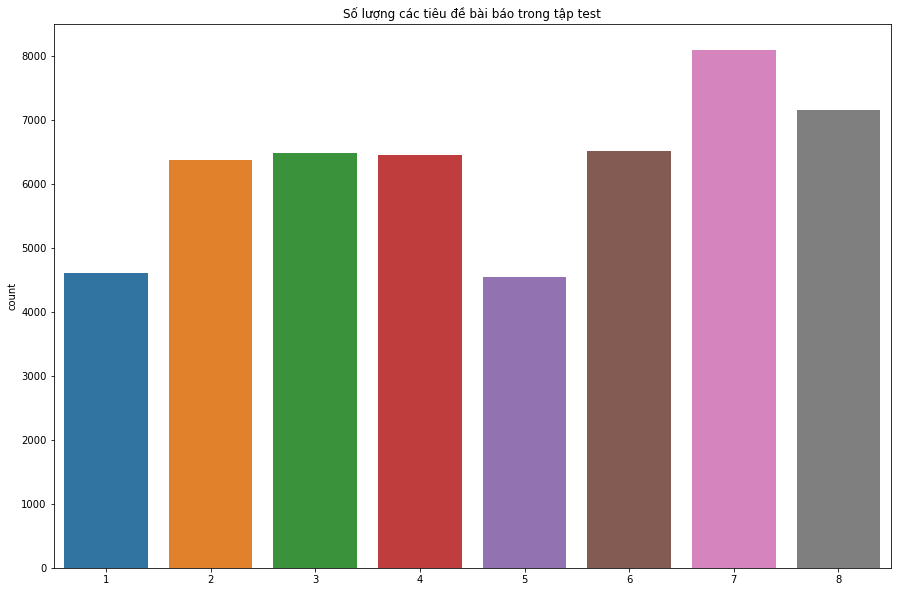

In [ ]:
print(f"testing shape: {len(X_test)}")
plt.figure(figsize=(15,10))
sns.countplot(y_test).set_title('Số lượng các tiêu đề bài báo trong tập test')

#Feature extractor: Tensor flow inverse document frequency
* Giá trị của một word trong corpus có mối quan hệ sau: quan hệ thuận với tần số xuất hiện trong 1 câu, nhưng tỉ lệ nghịch với tần số xuất hiện trong corpus

In [ ]:
#dictionary dùng để lưu các classifier sau khi train xong
tfidf_model = {}
#Hàm dùng để tạo inverse document frequency từ tập tiêu đề
#Chọn ngram_range là (1,2) để bao gồm các từ đơn và từ ghép đôi
def create_idf(message_list, stopwords):
    vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words=stopwords)
    doc = vectorizer.fit_transform(message_list)
    return doc, vectorizer

##Stop word
Do tiêu đề đã được viết theo phong cách trang trọng hoặc rất ngắn ngọn nên không cần thiết sử dụng tập stop words cho Tiếng Việt được nói hằng ngày. Chỉ cần lọc ra một số từ mà em nghĩ sẽ không cần thiết cho model. 

In [ ]:
stop_words = ['có_thể', 'để', 'những', 'ngày', 'làm', 'vì_sao', 'ngày_càng', 'vì', 'cùng', 'từ', 'sau', 'với', 'sẽ', 'có', 'nên', 'hơn', 'vào', 'trong', 'bị']
X_train_idf, vectorizer = create_idf(X_train, stop_words) 
X_test_idf = vectorizer.transform(X_test)
print(f'train shape: {X_train_idf.shape}')
print(f'test shape: {X_test_idf.shape}')


train shape: (117125, 387729)
test shape: (50197, 387729)


In [ ]:
vectorizer.vocabulary_

{'người': 193231,
 'việt': 329277,
 'tốn': 319550,
 'gần': 101540,
 'tỷ': 323657,
 'usd': 324960,
 'uống': 325894,
 'bia': 6975,
 'năm': 211204,
 'người việt': 194384,
 'việt tốn': 329839,
 'tốn gần': 319555,
 'gần tỷ': 101801,
 'tỷ usd': 323995,
 'usd uống': 325332,
 'uống bia': 325896,
 'bia năm': 7015,
 'phân_biệt': 223184,
 'see': 246186,
 'look': 150827,
 'watch': 344236,
 'view': 327736,
 'phân_biệt see': 223308,
 'see look': 246187,
 'look watch': 150831,
 'watch view': 344257,
 'cựu': 72351,
 'hoa_hậu': 107749,
 'hòa': 115709,
 'bình': 14561,
 'loại': 151143,
 'khỏi': 138001,
 'miss': 168618,
 'universe': 324853,
 'australia': 4250,
 'cựu hoa_hậu': 72376,
 'hoa_hậu hòa': 107801,
 'hòa bình': 115715,
 'bình loại': 14632,
 'loại khỏi': 151233,
 'khỏi miss': 138160,
 'miss universe': 168639,
 'universe australia': 324854,
 'nghiên_cứu': 187625,
 'mới': 181215,
 'tiết_lộ': 285882,
 'bộ_phận': 25966,
 'gợi_cảm': 102908,
 'nhất': 204181,
 'trên_cơ_thể': 295504,
 'phụ_nữ': 228528,
 'n

##Data visualize
* Giảm chiều dữ liệu (truncated SVD) của tập train còn 2 components. 
Edit lại hàm plot_LSA từ link github để plot giá trị ngữ nghĩa của đặc headline-idf giữa các topics. Đồ thị bên dưới cho thấy sử dụng đặc trưng idf, giá trị idf của từ vựng thuộc các topics có sự phân biệt nhưng không quá rõ ràng, vẫn còn nhiều giá trị gần giống nhau giữa các chủ đề.
* Đối với chủ đề Giáo Dục (chủ đề 7), do headline thu thập về từ vnexpress có một số bài học tiếng anh ("Ý nghĩa thành ngữ 'apple of my eye'", "Trắc nghiệm phân biệt 'see', 'look', 'watch'",...) nên có rất nhiều giá trị từ vựng khác với những chủ đề còn lại.

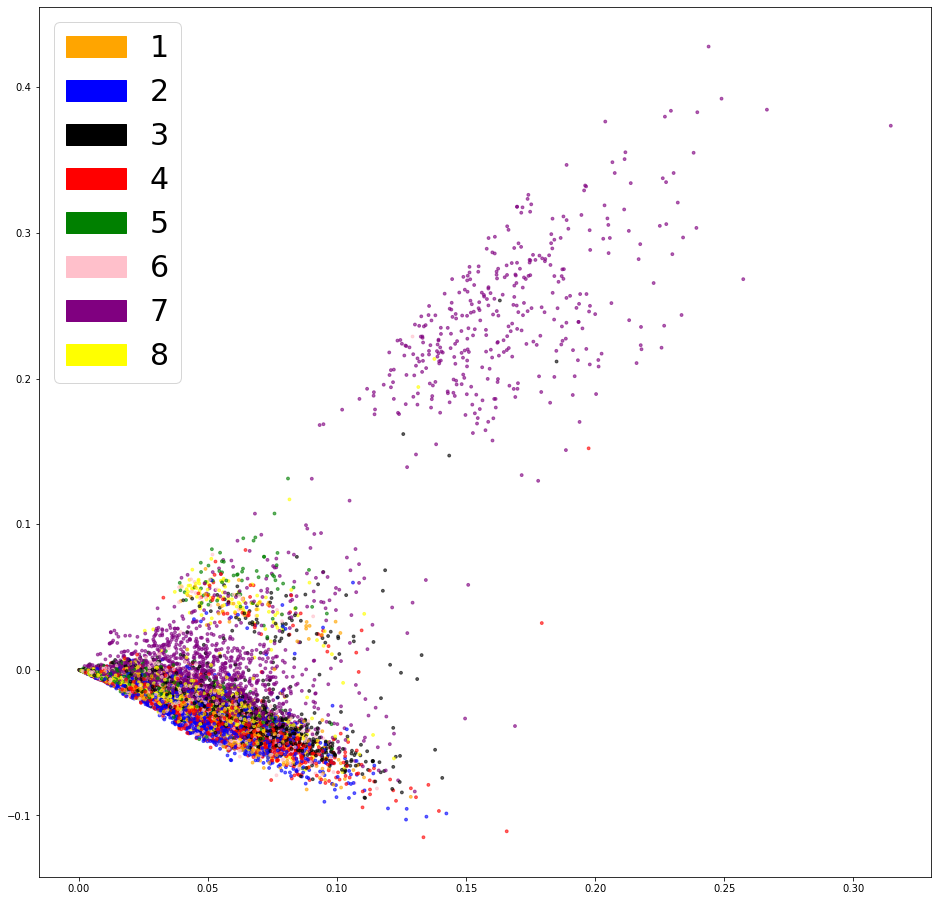

In [ ]:
#github: https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb
from sklearn.decomposition import TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','black', 'red', 'green', 'pink', 'purple', 'yellow']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.6, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='1')
            blue_patch = mpatches.Patch(color='blue', label='2')
            black_patch = mpatches.Patch(color='black', label='3')
            red_patch = mpatches.Patch(color='red', label='4')
            green_patch = mpatches.Patch(color='green', label='5')
            pink_patch = mpatches.Patch(color='pink', label='6')
            purple_patch = mpatches.Patch(color='purple', label='7')
            yellow_patch = mpatches.Patch(color='yellow', label = '8')
            plt.legend(handles=[orange_patch, blue_patch, black_patch, red_patch, green_patch, pink_patch, purple_patch, yellow_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_idf[:20000], y_train[:20000])
plt.show()

#Train models and Evaluate test result
* Chọn ra 5 classifier từ sklearn: LinearSVC, MultinomialNB, KNN, Logistic Regression và SGD classifier. 
* Score trong classification thường là mean accuracy: số lần đoán trúng / tổng số lần đoán.
* Lưu các model đã train vào dictionary.

In [ ]:
clf = make_pipeline(StandardScaler(with_mean=False),LinearSVC(max_iter=2000)).fit(X_train_idf, y_train)
tfidf_model['LinearSVC'] = clf
print("Performance on train set:{}\nPerformance on test set:{}".format(clf.score(X_train_idf,y_train),clf.score(X_test_idf, y_test)))

Performance on train set:0.999982924226254
Performance on test set:0.8718050879534633


c:\users\jundevice\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_idf, y_train)
tfidf_model['MultinomialNB'] = clf
print("Performance on train set:{}\nPerformance on test set:{}".format(clf.score(X_train_idf,y_train),clf.score(X_test_idf, y_test)))

Performance on train set:0.935752401280683
Performance on test set:0.8709883060740682


In [ ]:
clf = KNeighborsClassifier(n_neighbors=15).fit(X_train_idf, y_train)
tfidf_model['KNN'] = clf
print("Performance on train set:{}\nPerformance on test set:{}".format(clf.score(X_train_idf,y_train),clf.score(X_test_idf, y_test)))

Performance on train set:0.8465656350053362
Performance on test set:0.8200689284220173


In [ ]:
clf = make_pipeline(StandardScaler(with_mean=False),SGDClassifier(loss='perceptron',max_iter=1000, tol=1e-3)).fit(X_train_idf, y_train)
tfidf_model['SGDClassifier'] = clf
print("Performance on train set:{}\nPerformance on test set:{}".format(clf.score(X_train_idf,y_train),clf.score(X_test_idf, y_test)))

Performance on train set:0.999974386339381
Performance on test set:0.7839113891268402


In [ ]:
clf = make_pipeline(StandardScaler(with_mean=False), LogisticRegression(max_iter=2000)).fit(X_train_idf, y_train)
tfidf_model['LogisticRegression'] = clf
print("Performance on train set:{}\nPerformance on test set:{}".format(clf.score(X_train_idf,y_train),clf.score(X_test_idf, y_test)))

Performance on train set:0.999982924226254
Performance on test set:0.8775424826184832


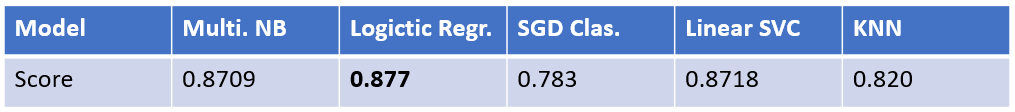

Ta thấy Logistic Regression cho ra score cao nhất (0.877). Đây không phải một kết quả cao và có thể được cải thiện nhờ nếu tìm được các parameter phù hợp hơn. Bởi vì chưa có nhiều phân biệt trong giá trị ngữ nghĩa giữa các từ vựng thuộc các chủ đề khác nhau nên model đoán nhầm trong một số trường hợp. 

Confusion matrix thể hiện tỉ lệ đoán nhầm giữa các chủ đề với nhau. Hàm in confusion matrix được tham khảo và edit từ link github bên dưới.

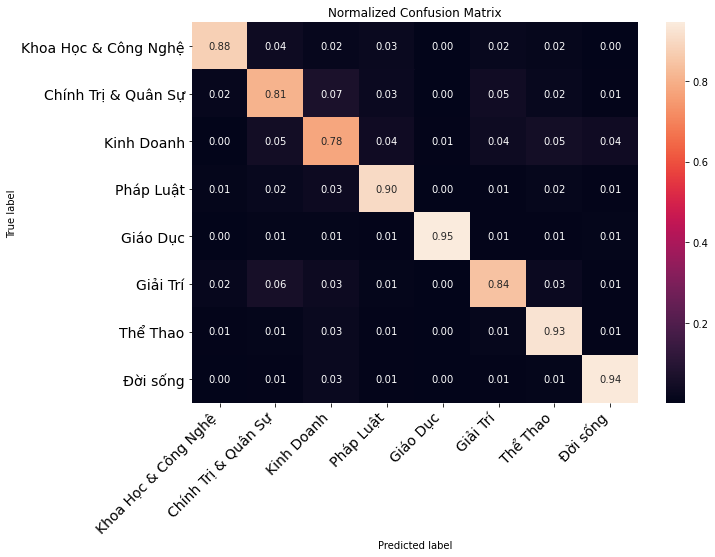

In [ ]:
#Based on shaypal5's gist: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
from sklearn.metrics import confusion_matrix
import numpy as np

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14, normalize=False):
    if normalize:
        confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
        title = 'Normalized Confusion Matrix'
    else:
        fmt = 'd'
        title = 'Confusion Matrix'
        
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, fmt=fmt)

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    heatmap.set_ylabel('True label')
    heatmap.set_xlabel('Predicted label')
    heatmap.set_title(title)
    return fig

conf_mat = confusion_matrix(y_test, clf.predict(X_test_idf))

# Get some readable labels
labels = [x for x in set(data['topic_names'])]
ax = print_confusion_matrix(conf_mat, labels, normalize=True)
plt.show()

#Hyper parameter tuning
Sử dụng thuật toán GridSearch (giống như brute-force search qua các tập parameter định sẵn để tìm ra bộ parameter tốt nhất) vào 3 model có kết quả tốt nhất. Tuy nhiên, thời gian thực thi quá lâu nên tạm thời chưa thể đưa ra những models với score tốt hơn. 

In [ ]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [
  {'kernel': ['rbf','sigmoid', 'linear'], 'gamma': [1e-3, 1e-4, 1e-2], 'C': [1, 10]}]
  
# Objective metrics
scores = ['precision']


clf = GridSearchCV(SVC(), tuned_parameters, cv=3, scoring='%s_macro' % scores[0], n_jobs=-1, verbose =5)
clf.fit(X_train_idf, y_train)

print("Best Hyperparameters found are:")
print(clf.best_params_)

print("Grid scores are:")

means = clf.cv_results_['mean_test_score']
for mean,params in zip(means, clf.cv_results_['params']):
  print("%0.3f for %r" % (mean, params))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
tuned_parameters = {
     'n_neighbors': [5,11,15],
     'weights': ['uniform', 'distance'],
     'metric': ['euclidean', 'manhattan']
}

# Objective metrics
scores = ['precision']

clf = GridSearchCV(
    KNeighborsClassifier(),
    tuned_parameters,
    verbose = 10,
    cv = 2,
    n_jobs = -1,
    scoring = scoring='%s_macro' % scores[0]
)

clf.fit(X_train_idf, y_train)

print("Best Hyperparameters found are:")
print(clf.best_params_)

print("Grid scores are:")

means = clf.cv_results_['mean_test_score']
for mean,params in zip(means, clf.cv_results_['params']):
  print("%0.3f for %r" % (mean, params))

In [ ]:
tuned_parameters = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
# Objective metrics
scores = ['precision']

clf = GridSearchCV(
    LogisticRegression(),
    tuned_parameters,
    verbose = 2,
    cv = 3,
    n_jobs = -1,
    scoring = scoring='%s_macro' % scores[0]
)

clf.fit(X_train_idf, y_train)

print("Best Hyperparameters found are:")
print(clf.best_params_)

print("Grid scores are:")

means = clf.cv_results_['mean_test_score']
for mean,params in zip(means, clf.cv_results_['params']):
  print("%0.3f for %r" % (mean, params))


Lưu lại các models để thực hiện demo phân loại.

In [ ]:
import joblib
classifiers = ['KNN', 'LinearSVC', 'LogisticRegression', 'SGDClassifier', 'MultinomialNB']
for clf_ in classifiers:
    joblib.dump(tfidf_model[clf_], clf_+'.sav')

Lưu lại tập corpus

In [ ]:
import pickle
with open('vectorizer.pickle', 'wb') as handle:
    pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

#Demonstration (test with other sources)
* Other sources bao gồm genk, techz, báo phụ nữ và báo thanh niên
* Tải thêm 994 tiêu đề bài báo để phân loại với model đã chọn


In [1]:
import requests
from lxml import html
import json
import joblib
import pickle

#structure for JSON files
def createData():
    data = {}
    data["topic"] = ""
    data["headline"] = ""
    return data

#Append topic + headline at the end of the file
def writeJSON(data, articles,topics, writeFile):
    for i in range(len(articles)):
        data["topic"] = topics
        data["headline"] = articles[i]
        with open(writeFile, "a+", encoding='utf8') as outfile:
            json.dump(data, outfile,ensure_ascii=False)
            outfile.write("\n")
        outfile.close()
    print('Done writing!')

#Send GET HTTP requests to server and receive [response 200]
#Parse html tree to get headline data
def getHeadline(link, headline_Xpath):
    h = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.106 Safari/537.36'}
    response = requests.get(link, headers=h)
    print(f'{link}: {response}')
    tree = html.fromstring(response.content)
    return tree.xpath(headline_Xpath), response.status_code

In [50]:

for i in range(1,10):
    thanhnien, _ = getHeadline(f'https://thanhnien.vn/the-thao/bong-da-viet-nam/trang-{i}.html',
                               '//*[@class="title"]/@title')
    thanhnien_data = createData()
    writeJSON(thanhnien_data, thanhnien, 5, 'input.json')

    phunu_headlines, _ = getHeadline(f"https://www.phunuonline.com.vn/hon-nhan-gia-dinh/chuyen-nha/?p={i}",
                                     '//*[@class="b-content"]/a/@title')
    phunu_data = createData()
    writeJSON(phunu_data, phunu_headlines, 3, 'input.json')

    thanhnien_headlines, _ = getHeadline(f"https://thanhnien.vn/thoi-su/chinh-tri/trang-{i}.html",
                                     '//*[@class="relative"]/article/h2/a/@title')
    thanhnien_data = createData()
    writeJSON(thanhnien_data, thanhnien_headlines, 1, 'input.json')

    phunu_headlines, _ = getHeadline(f"https://www.phunuonline.com.vn/giai-tri/?p={i}",
                                     '//*[@class="b-content"]/a/@title')
    phunu_data = createData()
    writeJSON(phunu_data, phunu_headlines, 8, 'input.json')

    phunu_headlines, _ = getHeadline(f"https://www.phunuonline.com.vn/giao-duc/?p={i}",
                                     '//*[@class="b-content"]/a/@title')
    phunu_data = createData()
    writeJSON(phunu_data, phunu_headlines, 7, 'input.json')

    tuoitre_headlines, _ = getHeadline(f"https://tuoitre.vn/phap-luat/trang-{i}.htm",
                                                  '//*[@class="title-news"]/a/@title')
    tuoitre_data = createData()
    writeJSON(tuoitre_data, tuoitre_headlines, 4, 'input.json')



    tuoitre_headlines, _ = getHeadline(f"https://tuoitre.vn/kinh-doanh/trang-{i}.htm",
                                                  '//*[@class="title-news"]/a/@title')
    tuoitre_data = createData()
    writeJSON(tuoitre_data, tuoitre_headlines, 2, 'input.json')


tuoitre_headlines, _ = getHeadline(f"https://congnghe.tuoitre.vn/",
                                                  '//*[@class="title-news"]/a/@title')
tuoitre_data = createData()
writeJSON(tuoitre_data, tuoitre_headlines, 6, 'input.json')

genk_headlines, _ = getHeadline(f"https://genk.vn/",
                                                  '//*[@class="knswli-title"]/a/@title')
genk_data = createData()
writeJSON(genk_data, genk_headlines, 6, 'input.json')

https://thanhnien.vn/the-thao/bong-da-viet-nam/trang-1.html: <Response [200]>
Done writing!
https://www.phunuonline.com.vn/hon-nhan-gia-dinh/chuyen-nha/?p=1: <Response [200]>
Done writing!
https://thanhnien.vn/thoi-su/chinh-tri/trang-1.html: <Response [200]>
Done writing!
https://www.phunuonline.com.vn/giai-tri/?p=1: <Response [200]>
Done writing!
https://www.phunuonline.com.vn/giao-duc/?p=1: <Response [200]>
Done writing!
https://tuoitre.vn/phap-luat/trang-1.htm: <Response [200]>
Done writing!
https://tuoitre.vn/kinh-doanh/trang-1.htm: <Response [200]>
Done writing!
https://thanhnien.vn/the-thao/bong-da-viet-nam/trang-2.html: <Response [200]>
Done writing!
https://www.phunuonline.com.vn/hon-nhan-gia-dinh/chuyen-nha/?p=2: <Response [200]>
Done writing!
https://thanhnien.vn/thoi-su/chinh-tri/trang-2.html: <Response [200]>
Done writing!
https://www.phunuonline.com.vn/giai-tri/?p=2: <Response [200]>
Done writing!
https://www.phunuonline.com.vn/giao-duc/?p=2: <Response [200]>
Done writing!

In [54]:
input = pd.read_json('input.json', lines=True)
input = input.sample(frac=1)
input['topic_names'] = [None] * len(input)
input.loc[input.topic==1, 'topic_names'] = "Chính Trị & Quân Sự"
input.loc[input.topic==2, 'topic_names'] = "Kinh Doanh"
input.loc[input.topic==3, 'topic_names'] = "Đời sống"
input.loc[input.topic==4, 'topic_names'] = "Pháp Luật"
input.loc[input.topic==5, 'topic_names'] = "Thể Thao"
input.loc[input.topic==6, 'topic_names'] = "Khoa Học & Công Nghệ"
input.loc[input.topic==7, 'topic_names'] = "Giáo Dục"
input.loc[input.topic==8, 'topic_names'] = "Giải Trí"
cols = ["headline", "topic", "topic_names"]
input = input[cols].reset_index(drop=True)
input = input.drop_duplicates(subset=['headline'])
input[:10]

,headline,topic,topic_names
0,"Không để tham nhũng, lãng phí đất nông nghiệp",1,Chính Trị & Quân Sự
1,Truyền hình báo Thanh Niên trực tiếp chương trình bình luận “Tiêu điểm bóng đá”,5,Thể Thao
2,"Masan chờ ""át chủ bài"" The CrownX ngăn VinCommerce bớt lỗ",2,Kinh Doanh
3,"HLV Hứa Hiền Vinh và học trò bị cấm 2 trận, Võ Văn Huy thoát án phạt",5,Thể Thao
4,Con virus dạy chúng ta điều gì?,3,Đời sống
5,Hủy tạm giam cựu bí thư Bến Cát,4,Pháp Luật
6,Điều tra “Ellen show” sau tố cáo phân biệt chủng tộc,8,Giải Trí
7,Quảng Nam: Ông Bùi Ngọc Ảnh giữ chức Chủ tịch UBND TP.Tam Kỳ,1,Chính Trị & Quân Sự
8,Bà Rịa Vũng Tàu (BR-VT): Lần đầu tiên Việt Nam in vé QR Code chống giả,5,Thể Thao
9,"Hỗ trợ ngành hàng không, hành khách phải được hưởng lợi",2,Kinh Doanh


In [55]:
input['headline'] = clean(input['headline'])
input['headline'] = input['headline'].apply(tokenize)
input.shape

(994, 3)

Text(0.5, 1.0, 'Số lượng các tiêu đề bài báo')

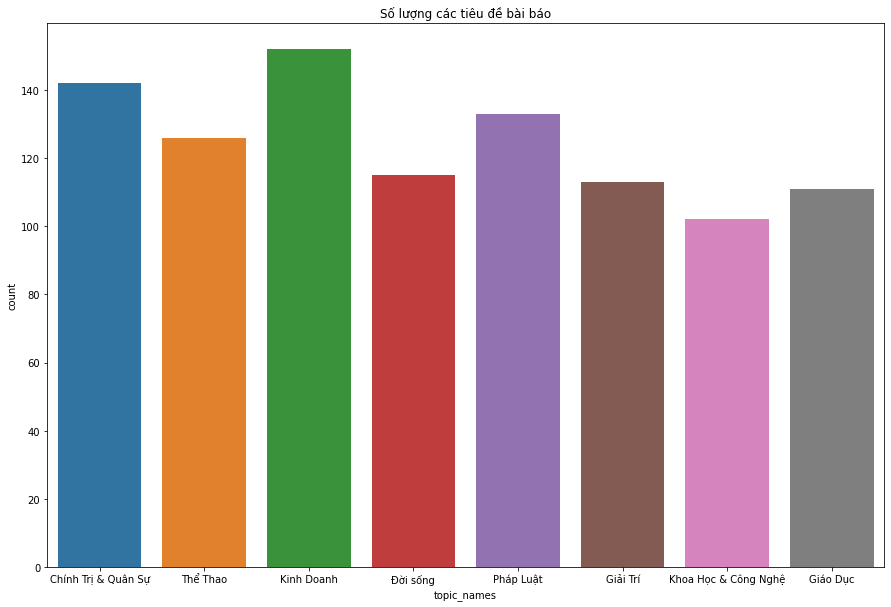

In [63]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.countplot(input.topic_names).set_title('Số lượng các tiêu đề bài báo')

In [56]:
def __predict(input, model='SGDClassifier.sav', vectorizer='vectorizer.pickle'):
    classifier = joblib.load(model)
    with open(vectorizer, 'rb') as handle:
      vocab = pickle.load(handle)
    input = vocab.transform(input)
    return classifier.predict(input)

##Đánh giá chung
* Khác với khi validate trên tập test cùng một source với tập train,  đổi source để tải tiêu đề thì accuracy giảm đi khá nhiều. 
* Quan sát confusion matrix bên dưới, ta thấy 3 chủ đề Giải trí, đời sống và giáo dục có accuracy thấp nhất. 
* Để hiểu rõ hơn, khi nhìn vào danh sách những tiêu đề bị phân loại sai, có rất nhiều từ vựng của chủ đề này có thể đúng với chủ đề khác và còn có những từ vựng không có trong corpus được train.

* Ví dụ:


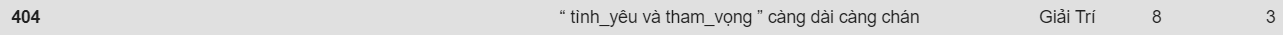

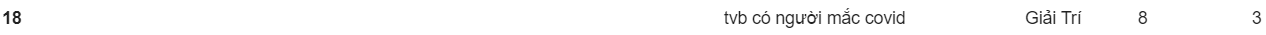

In [57]:
prediction = __predict(list(input['headline']), 'LinearSVC.sav')
num_correct = 0
for i in range(len(prediction)):
    if prediction[i] == list(input['topic'])[i]:
        num_correct += 1

print(f'\n\n----> GET {num_correct}/{len(input)} ({(num_correct/len(input))*100}%) CORRECT!\n')

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.0 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LinearSVC from version 0.23.0 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator Pipeline from version 0.23.0 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.23.0 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at



----> GET 739/994 (74.34607645875252%) CORRECT!



/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.23.0 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [58]:
prediction = __predict(list(input['headline']), 'LogisticRegression.sav')
num_correct = 0
for i in range(len(prediction)):
    if prediction[i] == list(input['topic'])[i]:
        num_correct += 1

print(f'\n\n----> GET {num_correct}/{len(input)} ({(num_correct/len(input))*100}%) CORRECT!\n\n')

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.0 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.0 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator Pipeline from version 0.23.0 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.23.0 when using version 0.22.2.post1. This might lead to breaking code or invalid result



----> GET 750/994 (75.45271629778671%) CORRECT!




/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.23.0 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


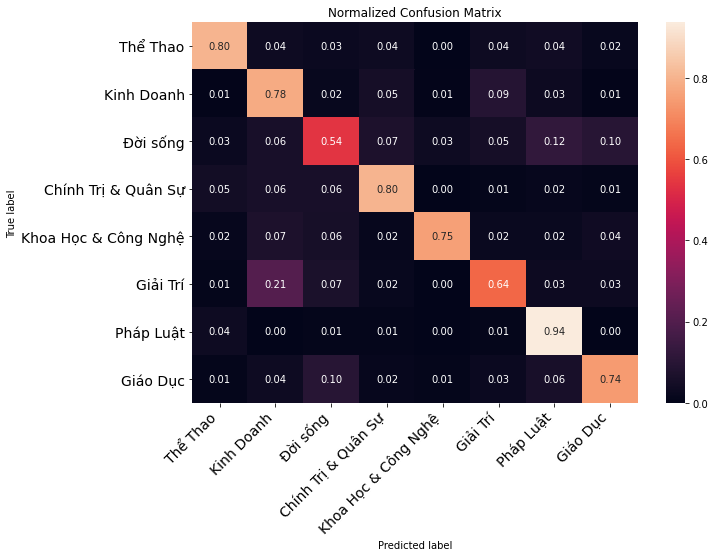

In [59]:
conf_mat = confusion_matrix(input['topic'], prediction)

# Get some readable labels
labels = [x for x in set(input['topic_names'])]
ax = print_confusion_matrix(conf_mat, labels, normalize=True)
plt.show()

In [60]:
input['prediction'] = prediction
input = input[["headline", "topic_names", "topic", "prediction"]]
input[input['topic'] != input['prediction']]

,headline,topic_names,topic,prediction
1,truyền_hình báo thanh_niên trực_tiếp chương_trình bình_luận “ tiêu_điểm bóng_đá ”,Thể Thao,5,7
4,con virus dạy chúng_ta điều gì,Đời sống,3,6
8,bà rịa vũng_tàu brvt lần đầu_tiên việt nam in vé qr code chống giả,Thể Thao,5,6
11,hướng_dẫn tải video facebook từ nhóm kín,Khoa Học & Công Nghệ,6,4
17,kỷ_luật quan_chức quảng_ngãi liên_quan đến dự_án đất_đai bổ_nhiệm,Pháp Luật,4,1
18,tvb có người mắc covid,Giải Trí,8,3
20,một trọng_tài được dí thổi liền trận ép một đội bóng công_bằng ở đâu,Thể Thao,5,3
23,nghề tay_trái của sao thể_thao kiếm thủ số đông nam á bán trà sữa online,Thể Thao,5,2
29,viếng ông trần quốc hương trong niềm tiếc_thương vô_hạn,Chính Trị & Quân Sự,1,8
33,sao phải thi vậy mẹ,Đời sống,3,8


#Kết Luận
###Hiệu quả:
* Chưa thể hiện được tính ổn định và hiệu quả để có thể tự động hóa một cách đáng tin cậy hoàn toàn bài toán đặt ra

###Hướng phát triển: 
* Chạy thêm parameter tuning cho cả model lẫn feature extraction để cải thiện accuracy
* Thay vì chỉ dùng headline, có thể lấy thêm một đoạn ngắn từ bài báo để cải thiện việc phân loại. Do tiêu đề có thể chưa thể hiện đầy đủ nội dung cần để phân loại chủ đề.
* Cải thiện bước tiền xử lí tiếng Việt
* Có thể phát triển thành bài toán tự động gắn news tag thay vì chỉ gắn chủ đề  